# Planejamento Fatorial Completo - Cálculo do erro de um efeito

Neste notebook, o objetivo é realizar um planejamento fatorial 2k, com k = 3, dando um total de 8 experimentos.

Pórem, neste experimento, foram realizados 3 experimentos no ponto central, sendo possível assim, calcularmos o erro e tomarmos a decisão de retirar ou não uma variável baseado em significância estatística e não apenas uma mera análise gráfica.

O experimento consiste em realizar a digestão de óleo lubrificante encapsulado em forno de microondas de forma a minimizar 2 variáveis: a acidez  do digerido (mol/L) e o teor de carbono residual (% m/v).

As variáveis estudadas no planejamento foram:

v1: Massa (mg) - 200 (-1), 400 (0) e 600 (+1)

v2: Número de Alíquotas - 1 (-1), 2 (0) e 3 (+1)

v3: Temperatura de adição (°C) - 130 (-1), 140 (0) e 150 (+1)

Referência: BRESSANI, Flavia et al. Digestão de Óleo Lubrificante Encapsulado em Forno de Microondas com Radiação Focalizada por Adição de Amostra ao Reagente Pré-Aquecido. **Química Nova.** Vol. 29, N° 6, p. 1210-1214, 2006.

A matriz de planejamento já está pronta no arquivo excel "exp2.xlsx"

Porém, caso tivéssemos somente o vetor coluna com as respostas, poderíamos utilizar a biblioteca pyDOE para gerar um fatorial 2 k=3.



In [ ]:
#Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Abrindo o arquivo com a matriz de planejamento
planejamento = pd.read_excel('/content/exp2.xls')

In [ ]:
#Visualizando a matriz
planejamento

,Exp,Massa (v1),Alíquotas (v2),Temperatura (v3),"Acidez (mol/L), R1","RCC (% m/v), R2"
0,1,-1,-1,-1,0.72,2.62
1,2,-1,-1,1,1.09,2.26
2,3,-1,1,-1,0.55,2.49
3,4,-1,1,1,1.07,2.45
4,5,1,-1,-1,0.97,0.68
5,6,1,-1,1,1.22,2.37
6,7,1,1,-1,1.16,2.77
7,8,1,1,1,1.24,2.69
8,9,0,0,0,1.13,2.14
9,10,0,0,0,1.17,2.32


In [ ]:
#Definindo a matriz apenas com as variáveis preditoras, sem a resposta
matriz = planejamento.iloc[0:8, 1:4]

In [ ]:
matriz

,Massa (v1),Alíquotas (v2),Temperatura (v3)
0,-1,-1,-1
1,-1,-1,1
2,-1,1,-1
3,-1,1,1
4,1,-1,-1
5,1,-1,1
6,1,1,-1
7,1,1,1


# Definindo função para cálculo dos efeitos

In [ ]:
#Definindo função para calcular os efeitos primários

def efeitos_primarios(var, resposta):
  efeito = var * resposta
  return efeito

In [ ]:
#Definindo função para calcular os efeitos secundários

def efeitos_secundarios(var1, var2, resposta):
  efeito = var1 * var2 * resposta
  return efeito

In [ ]:
#Definindo função para calcular os efeitos terciários

def efeitos_terciarios(var1, var2, var3, resposta):
  efeito = var1 * var2 * var3 * resposta
  return efeito

In [ ]:
#Efeitos para a Resposta Acidez
efeito1_r1 = efeitos_primarios(matriz['Massa (v1)'], planejamento['Acidez (mol/L), R1'])
efeito2_r1 = efeitos_primarios(matriz['Alíquotas (v2)'], planejamento['Acidez (mol/L), R1'])
efeito3_r1 = efeitos_primarios(matriz['Temperatura (v3)'], planejamento['Acidez (mol/L), R1'])
efeito12_r1 = efeitos_secundarios(matriz['Massa (v1)'], matriz['Alíquotas (v2)'], planejamento['Acidez (mol/L), R1'])
efeito13_r1 = efeitos_secundarios(matriz['Massa (v1)'], matriz['Temperatura (v3)'], planejamento['Acidez (mol/L), R1'])
efeito23_r1 = efeitos_secundarios(matriz['Alíquotas (v2)'], matriz['Temperatura (v3)'], planejamento['Acidez (mol/L), R1'])
efeito123_r1 = efeitos_terciarios(matriz['Massa (v1)'], matriz['Alíquotas (v2)'], matriz['Temperatura (v3)'], planejamento['Acidez (mol/L), R1'])

In [ ]:
#Efeitos para a Resposta RCC
efeito1_r2 = efeitos_primarios(matriz['Massa (v1)'], planejamento['RCC (% m/v), R2'])
efeito2_r2 = efeitos_primarios(matriz['Alíquotas (v2)'], planejamento['RCC (% m/v), R2'])
efeito3_r2 = efeitos_primarios(matriz['Temperatura (v3)'], planejamento['RCC (% m/v), R2'])
efeito12_r2 = efeitos_secundarios(matriz['Massa (v1)'], matriz['Alíquotas (v2)'], planejamento['RCC (% m/v), R2'])
efeito13_r2 = efeitos_secundarios(matriz['Massa (v1)'], matriz['Temperatura (v3)'], planejamento['RCC (% m/v), R2'])
efeito23_r2 = efeitos_secundarios(matriz['Alíquotas (v2)'], matriz['Temperatura (v3)'], planejamento['RCC (% m/v), R2'])
efeito123_r2 = efeitos_terciarios(matriz['Massa (v1)'], matriz['Alíquotas (v2)'], matriz['Temperatura (v3)'], planejamento['RCC (% m/v), R2'])


In [ ]:
lista_efeitos = [efeito1_r1, efeito2_r1, efeito3_r1, efeito12_r1, efeito13_r1, efeito23_r1, efeito123_r1,
                 efeito1_r2, efeito2_r2, efeito3_r2, efeito12_r2, efeito13_r2, efeito23_r2, efeito123_r2]

efeitos_ = pd.concat(lista_efeitos, axis=1)

In [ ]:
efeitos_.columns = ['efeito1_r1', 'efeito2_r1', 'efeito3_r1', 'efeito12_r1', 'efeito13_r1', 'efeito23_r1', 'efeito123_r1',
                    'efeito1_r2', 'efeito2_r2', 'efeito3_r2', 'efeito12_r2', 'efeito13_r2', 'efeito23_r2', 'efeito123_r2']

In [ ]:
matriz_total = pd.concat([matriz, efeitos_], axis=1)

In [ ]:
matriz_total

,Massa (v1),Alíquotas (v2),Temperatura (v3),efeito1_r1,efeito2_r1,efeito3_r1,efeito12_r1,efeito13_r1,efeito23_r1,efeito123_r1,efeito1_r2,efeito2_r2,efeito3_r2,efeito12_r2,efeito13_r2,efeito23_r2,efeito123_r2
0,-1.0,-1.0,-1.0,-0.72,-0.72,-0.72,0.72,0.72,0.72,-0.72,-2.62,-2.62,-2.62,2.62,2.62,2.62,-2.62
1,-1.0,-1.0,1.0,-1.09,-1.09,1.09,1.09,-1.09,-1.09,1.09,-2.26,-2.26,2.26,2.26,-2.26,-2.26,2.26
2,-1.0,1.0,-1.0,-0.55,0.55,-0.55,-0.55,0.55,-0.55,0.55,-2.49,2.49,-2.49,-2.49,2.49,-2.49,2.49
3,-1.0,1.0,1.0,-1.07,1.07,1.07,-1.07,-1.07,1.07,-1.07,-2.45,2.45,2.45,-2.45,-2.45,2.45,-2.45
4,1.0,-1.0,-1.0,0.97,-0.97,-0.97,-0.97,-0.97,0.97,0.97,0.68,-0.68,-0.68,-0.68,-0.68,0.68,0.68
5,1.0,-1.0,1.0,1.22,-1.22,1.22,-1.22,1.22,-1.22,-1.22,2.37,-2.37,2.37,-2.37,2.37,-2.37,-2.37
6,1.0,1.0,-1.0,1.16,1.16,-1.16,1.16,-1.16,-1.16,-1.16,2.77,2.77,-2.77,2.77,-2.77,-2.77,-2.77
7,1.0,1.0,1.0,1.24,1.24,1.24,1.24,1.24,1.24,1.24,2.69,2.69,2.69,2.69,2.69,2.69,2.69
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Excluindo as linhas 8, 9 e 10 que correscpondem aos pontos centrais

matriz_total.drop([8, 9, 10], axis=0, inplace=True)
matriz_total

,Massa (v1),Alíquotas (v2),Temperatura (v3),efeito1_r1,efeito2_r1,efeito3_r1,efeito12_r1,efeito13_r1,efeito23_r1,efeito123_r1,efeito1_r2,efeito2_r2,efeito3_r2,efeito12_r2,efeito13_r2,efeito23_r2,efeito123_r2
0,-1.0,-1.0,-1.0,-0.72,-0.72,-0.72,0.72,0.72,0.72,-0.72,-2.62,-2.62,-2.62,2.62,2.62,2.62,-2.62
1,-1.0,-1.0,1.0,-1.09,-1.09,1.09,1.09,-1.09,-1.09,1.09,-2.26,-2.26,2.26,2.26,-2.26,-2.26,2.26
2,-1.0,1.0,-1.0,-0.55,0.55,-0.55,-0.55,0.55,-0.55,0.55,-2.49,2.49,-2.49,-2.49,2.49,-2.49,2.49
3,-1.0,1.0,1.0,-1.07,1.07,1.07,-1.07,-1.07,1.07,-1.07,-2.45,2.45,2.45,-2.45,-2.45,2.45,-2.45
4,1.0,-1.0,-1.0,0.97,-0.97,-0.97,-0.97,-0.97,0.97,0.97,0.68,-0.68,-0.68,-0.68,-0.68,0.68,0.68
5,1.0,-1.0,1.0,1.22,-1.22,1.22,-1.22,1.22,-1.22,-1.22,2.37,-2.37,2.37,-2.37,2.37,-2.37,-2.37
6,1.0,1.0,-1.0,1.16,1.16,-1.16,1.16,-1.16,-1.16,-1.16,2.77,2.77,-2.77,2.77,-2.77,-2.77,-2.77
7,1.0,1.0,1.0,1.24,1.24,1.24,1.24,1.24,1.24,1.24,2.69,2.69,2.69,2.69,2.69,2.69,2.69


# Calculando os efeitos

In [ ]:
soma1 = matriz_total.iloc[:,3:10].sum()
soma2 = matriz_total.iloc[:, 10:].sum()
efeitos_brutos_resposta1 = soma1 / 4
efeitos_brutos_resposta2 = soma2 / 4

In [ ]:
efeitos_brutos_resposta1 = efeitos_brutos_resposta1.sort_values(ascending=True)

In [ ]:
efeitos_brutos_resposta2 = efeitos_brutos_resposta2.sort_values(ascending=True)

# Gráfico dos Efeitos Brutos

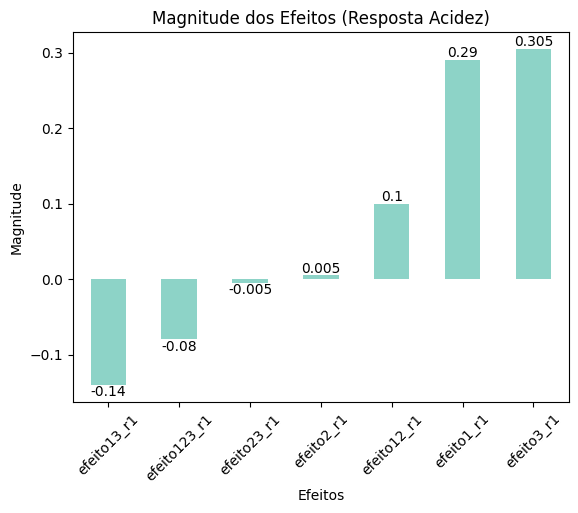

In [ ]:
#Gráfico dos efeitos brutos para a resposta Acidez.

efeitos_brutos_resposta1.plot(kind='bar', color='#8dd3c7')
for i, valor in enumerate(efeitos_brutos_resposta1):
  if valor < 0:
    plt.text(i, valor, np.float32(valor), ha='center', va='top')
  else:
    plt.text(i, valor, np.float32(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.title('Magnitude dos Efeitos (Resposta Acidez)')
plt.show()

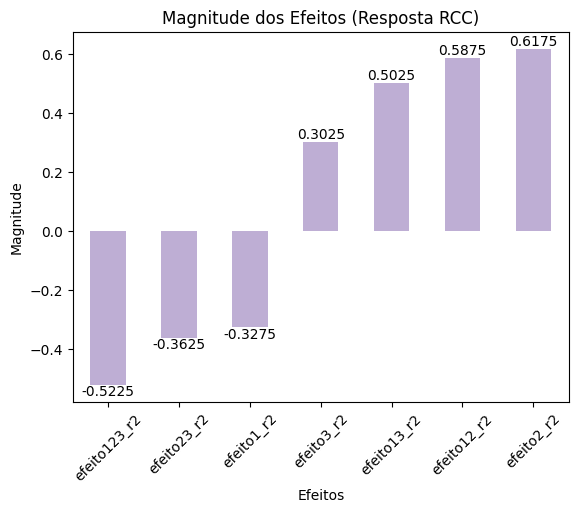

In [ ]:
#Gráfico dos efeitos brutos para a resposta RCC.

efeitos_brutos_resposta2.plot(kind='bar', color='#beaed4')
for i, valor in enumerate(efeitos_brutos_resposta2):
  if valor < 0:
    plt.text(i, valor, np.float32(valor), ha='center', va='top')
  else:
    plt.text(i, valor, np.float32(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.title('Magnitude dos Efeitos (Resposta RCC)')
plt.show()

# Calculando a porcentagem de cada efeito

In [ ]:
#Elevando os efeitos ao quadrado para retirar o sinal negativo
quadrado_efeitos_resposta1 = efeitos_brutos_resposta1 ** 2
quadrado_efeitos_resposta2 = efeitos_brutos_resposta2 ** 2

In [ ]:
#Somando todos os efeitos
soma_efeitos_resposta1 = quadrado_efeitos_resposta1.sum()
soma_efeitos_resposta2 = quadrado_efeitos_resposta2.sum()

In [ ]:
# Definindo a porcentagem de cada efeito
porcentagem_efeitos_resposta1 = (quadrado_efeitos_resposta1 / soma_efeitos_resposta1) * 100
porcentagem_efeitos_resposta2 = (quadrado_efeitos_resposta2 / soma_efeitos_resposta2) * 100

In [ ]:
#Colocando as porcentagens em ordem crescente
porcentagem_resposta1 = porcentagem_efeitos_resposta1.sort_values(ascending=True)
porcentagem_resposta2= porcentagem_efeitos_resposta2.sort_values(ascending=True)

# Gráfico de contribuição dos efeitos

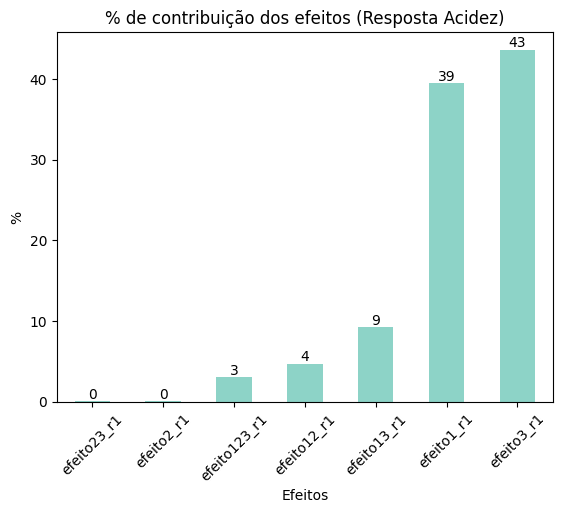

In [ ]:
# Gráfico de contribuição efetiva para a resposta Acidez

porcentagem_resposta1.plot(kind='bar', color='#8dd3c7')
for i, valor in enumerate(porcentagem_resposta1):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos (Resposta Acidez)')
plt.show()


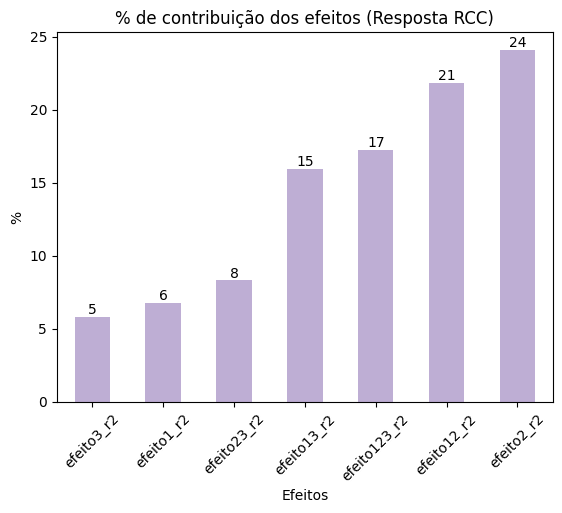

In [ ]:
# Gráfico de contribuição efetiva para a resposta RCC

porcentagem_resposta2.plot(kind='bar', color='#beaed4')
for i, valor in enumerate(porcentagem_resposta2):
  plt.text(i, valor, int(valor), ha='center', va='bottom')
plt.xlabel('Efeitos')
plt.ylabel('%')
plt.xticks(rotation=45)
plt.title('% de contribuição dos efeitos (Resposta RCC)')
plt.show()

#Calculando a área e o valor de z

In [ ]:
#Definindo uma curva com 7 partes
zero = 0
incremento = 1/7
elementos = 7

inicio = [zero + i * incremento for i in range(elementos)]

In [ ]:
#Sequência númerica de 7
seq = list(range(1, 8))

final = [num/7 for num in seq]

In [ ]:
# Somando as listas para poder gerar a média
soma_listas = [x + y for x, y in zip(inicio, final)]

In [ ]:
# Média das listas que representa a probabilidade debaixo da curva
ponto_central = [i /2 for i in soma_listas]

In [ ]:
#Calculando a média e desvio padrão
media = np.mean(ponto_central)
std = np.std(ponto_central)

In [ ]:
#Calculando o z score
z = np.round([(i - media) / std for i in ponto_central], decimals=3)

# Gráfico de probabilidade

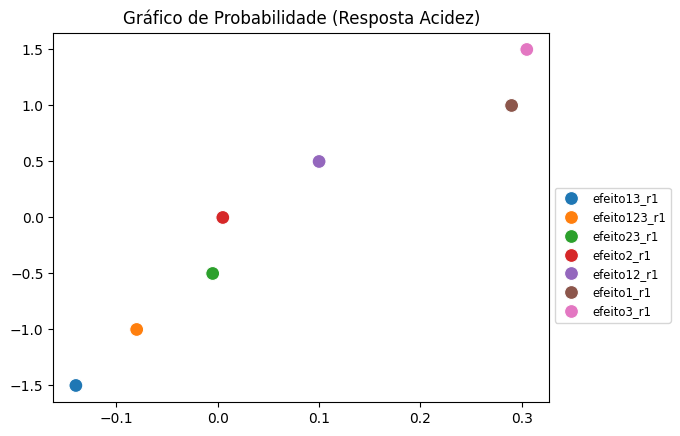

In [ ]:
# Gráfico de probabilidade para a resposta Acidez

prob1 = sns.scatterplot(x=efeitos_brutos_resposta1.values, y=z, hue=efeitos_brutos_resposta1.index, s=100)
prob1.set_title('Gráfico de Probabilidade (Resposta Acidez)')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.2));

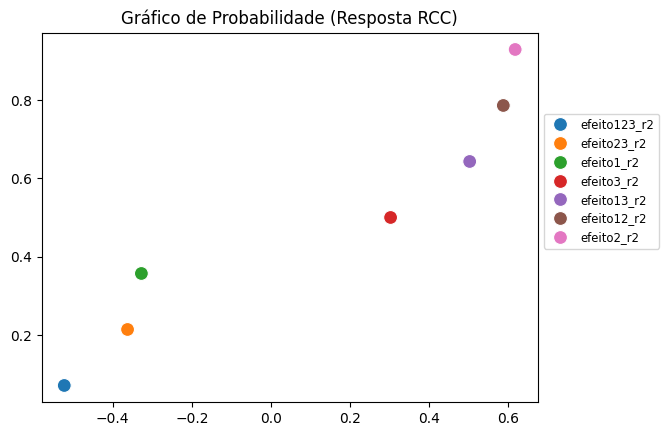

In [ ]:
# Gráfico de probabilidade para a resposta RCC
prob2 = sns.scatterplot(x=efeitos_brutos_resposta2.values, y=ponto_central, hue=efeitos_brutos_resposta2.index,s=100)
prob2.set_title('Gráfico de Probabilidade (Resposta RCC)')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.4));

#Calculando o erro de um efeito

O cálculo do erro de um efeito é dado por:

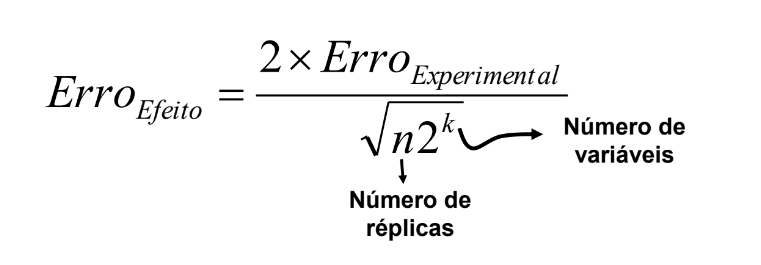

In [ ]:
#Selecionando apenas os pontos centrais em triplicata
r1 = planejamento.iloc[8:11, 4].reset_index(drop=True)
r2 = planejamento.iloc[8:11, 5].reset_index(drop=True)

In [ ]:
#Calculando o erro padrão para a resposta 1
np.std(r1)

0.016996731711975962

In [ ]:
#Calculando o erro padrão para a resposta 2
np.std(r2)

0.40274061131204525

In [ ]:
#Calculando o denominador da equação
denominador = np.sqrt((3 * (2 ** 3)))


In [ ]:
denominador

4.898979485566356

In [ ]:
#Calculando o erro dos efeitos para a resposta 1 e 2
erro_efeito_r1 = (2 * np.std(r1)) / denominador
erro_efeito_r2 = (2 * np.std(r2)) / denominador

In [ ]:
erro_efeito_r1

0.006938886664887115

In [ ]:
erro_efeito_r2

0.16441816606851362

#Calculando o valor de t para o intervalo de confiança

In [ ]:
# Valor de t para 95% de confiança e 2 graus de liberdade
from scipy.stats import t

alfa = 0.05

t_tabelado = t.ppf(1 - alfa/2, 2)


In [ ]:
t_tabelado

4.302652729911275

In [ ]:
erro_r1 = erro_efeito_r1 * t_tabelado
erro_r2 = erro_efeito_r2 * t_tabelado

#Gráfico de probabilidade com a estimativa do erro

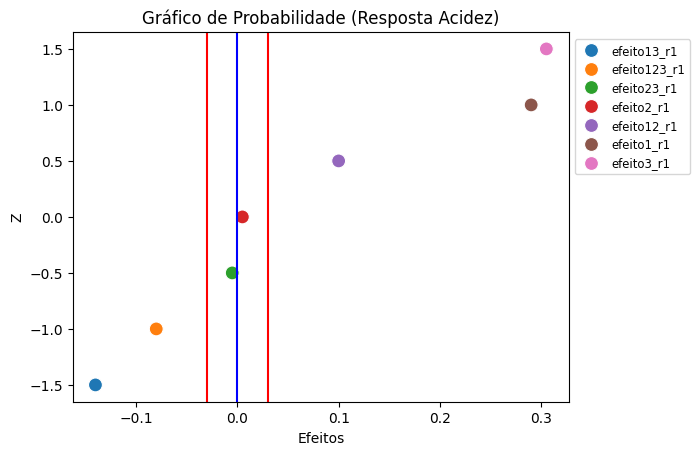

In [ ]:
# Gráfico de probabilidade para a resposta Acidez

limite_inferior = 0 - erro_r1
limite_superior = 0 + erro_r1
media = 0

sns.scatterplot(x=efeitos_brutos_resposta1.values, y=z, hue=efeitos_brutos_resposta1.index, s=100).set_title('Gráfico de Probabilidade (Resposta Acidez)')
plt.axvline(x=limite_inferior, color='r')
plt.axvline(x=limite_superior, color='r')
plt.axvline(x=media, color='b')
plt.xlabel('Efeitos')
plt.ylabel('Z')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.6));

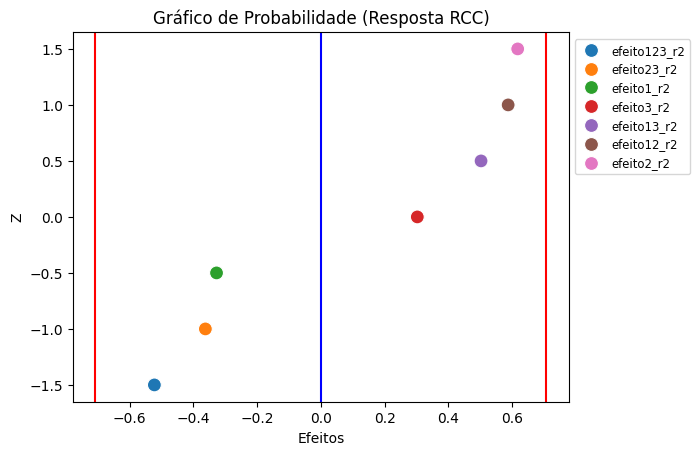

In [ ]:
# Gráfico de probabilidade para a resposta RCC
limite_inferior_ = 0 - erro_r2
limite_superior_ = 0 + erro_r2
media_ = 0

sns.scatterplot(x=efeitos_brutos_resposta2.values, y=z, hue=efeitos_brutos_resposta2.index, s=100).set_title('Gráfico de Probabilidade (Resposta RCC)')
plt.axvline(x=limite_inferior_, color='r')
plt.axvline(x=limite_superior_, color='r')
plt.axvline(x=media_, color='b')
plt.xlabel('Efeitos')
plt.ylabel('Z')
plt.legend(fontsize='small', loc='lower left', bbox_to_anchor=(1, 0.6));

---
# Conclusão

O cálculo do erro de um efeito é extremamente importante, pois com ele, podemos ver qual os efeitos estatisticamente significantes e assim, sermos mais assertivos na triagem das variáveis.

Na resposta dois, por exemplo, sem o ponto central seria difícil saber qual variável é significante, pois pelo gráfico de probabilidade nenhuma variável está localizada no zero.

Porém, calculando-se o erro, podemos ver que nenhuma variável é significante, pois todas elas estão dentro do intervalo de confinaça do erro (os limites do IC são dados pela linha vermelha).
Isso significa que nenhuma das variáveis escolhidas para realizar o planejamento de fato influenciam na variável resposta.

Para a resposta 1 (Acidez), a variável 2 (Alíquota) não é estatisticamente significativa e pode-se manter ela no ponto central, por exemplo. Já a variável 1 e 3 (Massa e Temperatura) são as mais significativas, possuindo efeito positivo. Logo, para minimizar o teor de acidez do digerido, deve-se trabalhar com essas variáveis no nível baixo (-1), que para a massa é de 200 mg e para a temperatura de 130 °C.
